In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV

# # LaTeX style plots
# tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
#     "font.family": "serif",
#     # Use 10pt font in plots, to match 10pt font in document
#     "axes.labelsize": 10,
#     "font.size": 10,
#     # Make the legend/label fonts a little smaller
#     "legend.fontsize": 10,
#     "xtick.labelsize": 10,
#     "ytick.labelsize": 10
#     }
# plt.rcParams.update(tex_fonts)

# Read in data, split into train and test sets

In [235]:
# read in data and convert time axis to datetime
df = pd.read_csv('../air_weather_data/pollution_and_weather_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %H:%M')
df = df.set_index('Date')

# Create lagged values of all pollutants

In [236]:
df['PM$_{10}$, Torkel Knutssonsgatan, lag 1'] = df['PM$_{10}$, Torkel Knutssonsgatan'].shift(1)
df['PM$_{10}$, Torkel Knutssonsgatan, lag 2'] = df['PM$_{10}$, Torkel Knutssonsgatan'].shift(2)
df['PM$_{10}$, Torkel Knutssonsgatan, lag 3'] = df['PM$_{10}$, Torkel Knutssonsgatan'].shift(3)
df['PM$_{10}$, Torkel Knutssonsgatan, lag 4'] = df['PM$_{10}$, Torkel Knutssonsgatan'].shift(4)
df['PM$_{10}$, Torkel Knutssonsgatan, lag 5'] = df['PM$_{10}$, Torkel Knutssonsgatan'].shift(5)
df['PM$_{10}$, Torkel Knutssonsgatan, lag 6'] = df['PM$_{10}$, Torkel Knutssonsgatan'].shift(6)

df['PM$_{2.5}$, Torkel Knutssonsgatan, lag 1'] = df['PM$_{2.5}$, Torkel Knutssonsgatan'].shift(1)
# df['PM$_{2.5}$, Torkel Knutssonsgatan, lag 2'] = df['PM$_{2.5}$, Torkel Knutssonsgatan'].shift(2)
# df['NO$_2$, Torkel Knutssonsgatan, lag 1'] = df['NO$_2$, Torkel Knutssonsgatan'].shift(1)

df['PM$_{10}$, Hornsgatan, lag 1'] = df['PM$_{10}$, Hornsgatan'].shift(1)
# df['PM$_{2.5}$, Hornsgatan, lag 1'] = df['PM$_{2.5}$, Hornsgatan'].shift(1)

# df['PM$_{10}$, Norr Malma, lag 1'] = df['PM$_{10}$, Norr Malma'].shift(1)
# df['PM$_{2.5}$, Norr Malma, lag 1'] = df['PM$_{2.5}$, Norr Malma'].shift(1)

df = df.dropna() # dropping first row which now contains nan values
df = df.drop(['NO$_2$, Torkel Knutssonsgatan',
              'PM$_{2.5}$, Torkel Knutssonsgatan',
              'PM$_{10}$, Hornsgatan',
              'PM$_{2.5}$, Hornsgatan',
              'PM$_{10}$, Norr Malma',
              'PM$_{2.5}$, Norr Malma',
              'Temperature',
              'Atmospheric pressure',
              'Relative humidity',
              'Precipitation',
              'Solar radiation',
              'Wind speed',
              'sine day', 'cosine day', 'sine week', 'cosine week', 'sine year','cosine year'
              ],axis=1)
df

,"PM$_{10}$, Torkel Knutssonsgatan","PM$_{10}$, Torkel Knutssonsgatan, lag 1","PM$_{10}$, Torkel Knutssonsgatan, lag 2","PM$_{10}$, Torkel Knutssonsgatan, lag 3","PM$_{10}$, Torkel Knutssonsgatan, lag 4","PM$_{10}$, Torkel Knutssonsgatan, lag 5","PM$_{10}$, Torkel Knutssonsgatan, lag 6","PM$_{2.5}$, Torkel Knutssonsgatan, lag 1","PM$_{10}$, Hornsgatan, lag 1"
Date,,,,,,,,,
2015-01-01 07:00:00,12.60,12.70,12.10,10.50,8.700,8.500,28.400,5.50,15.00
2015-01-01 08:00:00,12.00,12.60,12.70,12.10,10.500,8.700,8.500,6.70,13.70
2015-01-01 09:00:00,13.80,12.00,12.60,12.70,12.100,10.500,8.700,6.60,13.70
2015-01-01 10:00:00,15.80,13.80,12.00,12.60,12.700,12.100,10.500,6.70,14.70
2015-01-01 11:00:00,13.60,15.80,13.80,12.00,12.600,12.700,12.100,7.40,15.80
...,...,...,...,...,...,...,...,...,...
2021-12-31 20:00:00,2.78,2.30,2.50,2.37,0.707,0.622,-1.050,5.10,7.59
2021-12-31 21:00:00,3.41,2.78,2.30,2.50,2.370,0.707,0.622,5.02,6.54
2021-12-31 22:00:00,2.44,3.41,2.78,2.30,2.500,2.370,0.707,5.65,6.95


In [237]:
# split to train and test set
df_train = df['2016-01-01 00:00:00':'2019-01-01 00:00:00']
df_test = df['2021-01-01 00:00:00':]

# MinMax normalize train and test data 

In [238]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
# normalize and make dataframe of training set
train_norm = scaler.fit_transform(df_train.values)
df_train_norm = pd.DataFrame(train_norm, columns=df_train.columns) 

# normalize test set with statistics from training data and make dataframe
test_norm = scaler.transform(df_test.values)
df_test_norm = pd.DataFrame(test_norm, columns=df_test.columns)

# inversed = scaler.inverse_transform(df_train_norm) # inverse normalization
# df_train_norm['PM$_{2.5}$, Torkel Knutssonsgatan']
# df_train_norm.head(3)

# Split into X and y for PM10

In [239]:
X_pm10 = df_train_norm.drop(['PM$_{10}$, Torkel Knutssonsgatan', 
                            #  'PM$_{2.5}$, Torkel Knutssonsgatan',
                             ], axis=1)
y_pm10 = df_train_norm['PM$_{10}$, Torkel Knutssonsgatan']

X_pm10_test = df_test_norm.drop(['PM$_{10}$, Torkel Knutssonsgatan', 
                                #  'PM$_{2.5}$, Torkel Knutssonsgatan',
                                ], axis=1)
y_pm10_test = df_test_norm['PM$_{10}$, Torkel Knutssonsgatan']

# Split into X and y for PM2.5

In [233]:
X_pm2p5 = df_train_norm.drop(['PM$_{2.5}$, Torkel Knutssonsgatan', 
                            #   'PM$_{10}$, Torkel Knutssonsgatan',
                              ], axis=1)
y_pm2p5 = df_train_norm['PM$_{2.5}$, Torkel Knutssonsgatan']

X_pm2p5_test = df_test_norm.drop(['PM$_{2.5}$, Torkel Knutssonsgatan', 
                                #   'PM$_{10}$, Torkel Knutssonsgatan',
                                 ], axis=1)
y_pm2p5_test = df_test_norm['PM$_{2.5}$, Torkel Knutssonsgatan']

KeyError: "['PM$_{2.5}$, Torkel Knutssonsgatan'] not found in axis"

In [240]:
X_train = X_pm10[:]
y_train = y_pm10[:]

X_test = X_pm10_test[:]
y_test = y_pm10_test[:]

# X_train = X_pm2p5[:]
# y_train = y_pm2p5[:]

# X_test = X_pm2p5_test[:]
# y_test = y_pm2p5_test[:]

In [241]:
X_train 


,"PM$_{10}$, Torkel Knutssonsgatan, lag 1","PM$_{10}$, Torkel Knutssonsgatan, lag 2","PM$_{10}$, Torkel Knutssonsgatan, lag 3","PM$_{10}$, Torkel Knutssonsgatan, lag 4","PM$_{10}$, Torkel Knutssonsgatan, lag 5","PM$_{10}$, Torkel Knutssonsgatan, lag 6","PM$_{2.5}$, Torkel Knutssonsgatan, lag 1","PM$_{10}$, Hornsgatan, lag 1"
0,0.084592,0.079758,0.102115,0.087009,0.088218,0.082779,0.114865,0.063540
1,0.162236,0.084592,0.079758,0.102115,0.087009,0.088218,0.155405,0.104576
2,0.239879,0.162236,0.084592,0.079758,0.102115,0.087009,0.290541,0.145613
3,0.094864,0.239879,0.162236,0.084592,0.079758,0.102115,0.123311,0.065053
4,0.074320,0.094864,0.239879,0.162236,0.084592,0.079758,0.118243,0.057867
...,...,...,...,...,...,...,...,...
26300,0.053776,0.053172,0.059215,0.047734,0.048943,0.051964,0.023649,0.025719
26301,0.046526,0.053776,0.053172,0.059215,0.047734,0.048943,0.021959,0.021936
26302,0.064653,0.046526,0.053776,0.053172,0.059215,0.047734,0.025338,0.022315
26303,0.062236,0.064653,0.046526,0.053776,0.053172,0.059215,0.037162,0.030257


# Fit a classic MLR model with sklearn

In [242]:
regular_MLR = linear_model.LinearRegression(fit_intercept=True)
regular_MLR.fit(X_train, y_train)
print(regular_MLR.score(X_train, y_train))

0.7271924826523354


In [243]:
print('Train error:', (np.sqrt(mean_squared_error(regular_MLR.predict(X_train), y_train)).round(5)))
print('Test error:', (np.sqrt(mean_squared_error(regular_MLR.predict(X_test), y_test)).round(5)))

Train error: 0.02813
Test error: 0.02242


# Fit a ridge regression model

In [244]:
# PM10
n_alphas = 100
alphas = np.logspace(-3, 4, n_alphas)
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

0.9770099572992257


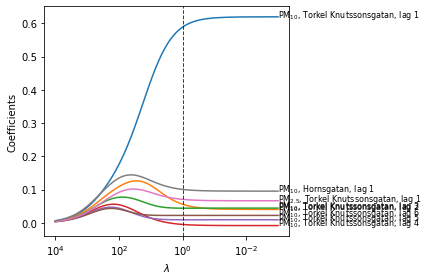

In [245]:
# select value of lambda with cross-validation
from sklearn.model_selection import GridSearchCV
pars = {'alpha':np.logspace(-3, 5, n_alphas)}
rr = GridSearchCV(linear_model.Ridge(), pars, scoring='r2', cv=10)
rr.fit(X_train, y_train)

bestalpha = rr.best_params_['alpha']
print(bestalpha)

# ridge trace plot
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
# ax.set_ylim(-.2,.55)

for i in range(len(X_train.columns)):
    plt.text(min(alphas), coefs[0][i], X_train.columns[i], fontsize=8)

plt.xlabel(r'$\lambda$')
plt.ylabel('Coefficients')
plt.axvline(bestalpha, color='k', linestyle='--', linewidth=1, alpha=.75)
plt.tight_layout()
# plt.savefig('../plots/PM10_ridge_regression.pdf')

In [247]:
rrbest = linear_model.Ridge(alpha=bestalpha, fit_intercept=False)
rrbest.fit(X_train, y_train)
(np.sqrt(mean_squared_error(rrbest.predict(X_train), y_train)).round(5), 
np.sqrt(mean_squared_error(rrbest.predict(X_test), y_test)).round(5)
)

(0.02848, 0.02302)

# Fit a lasso regression model

In [248]:
n_alphas = 100
alphas = np.logspace(-6, -1, n_alphas)
lasso = linear_model.Lasso()
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

lassocv = linear_model.LassoCV(cv=10)
lassocv.fit(X_train, y_train)
lassocv.alpha_

3.90931596902103e-06

In [249]:
np.min(lassocv.alphas_), np.max(lassocv.alphas_)

(2.757945133157886e-06, 0.0027579451331578835)

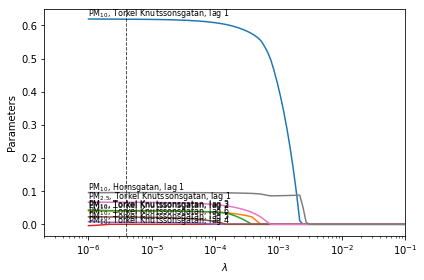

In [250]:
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlim(min(alphas)/5, max(alphas))
ax.set_xscale('log')

for i in range(len(X_pm10.columns)):
    plt.text(min(alphas), coefs[0][i]+0.01, X_train.columns[i], fontsize=8)

plt.axvline(lassocv.alpha_, color='k', linewidth=.9, linestyle='--', alpha=.75)
plt.xlabel(r'$\lambda$')
plt.ylabel('Parameters')
plt.tight_layout()
# plt.savefig('../plots/PM10_lasso_reg.pdf')

In [251]:
# coefs chosen by lasso model
for i, j in zip(lassocv.coef_.round(3), X_train.columns):
    print(i,':  ', j)

0.619 :   PM$_{10}$, Torkel Knutssonsgatan, lag 1
0.04 :   PM$_{10}$, Torkel Knutssonsgatan, lag 2
0.041 :   PM$_{10}$, Torkel Knutssonsgatan, lag 3
-0.0 :   PM$_{10}$, Torkel Knutssonsgatan, lag 4
0.006 :   PM$_{10}$, Torkel Knutssonsgatan, lag 5
0.022 :   PM$_{10}$, Torkel Knutssonsgatan, lag 6
0.066 :   PM$_{2.5}$, Torkel Knutssonsgatan, lag 1
0.096 :   PM$_{10}$, Hornsgatan, lag 1


In [252]:
(np.sqrt(mean_squared_error(lasso.predict(X_train), y_train)).round(5), 
np.sqrt(mean_squared_error(lasso.predict(X_test), y_test)).round(5)
)

(0.05386, 0.04875)

# Robust regression